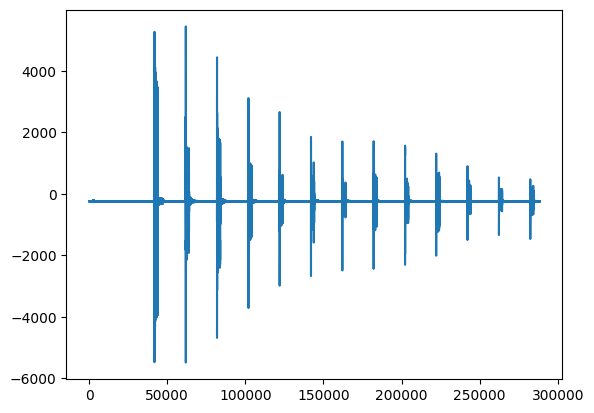

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wavio

from testing.gain_patterns.models import Experiment, ExperimentEntry

exp = Experiment.load_by_name("first")
entry = ExperimentEntry(experiment=exp, azimuth=30, trial=0)
signal = wavio.read(entry.wav_file_path).data.flatten()

plt.plot(signal)
plt.show()

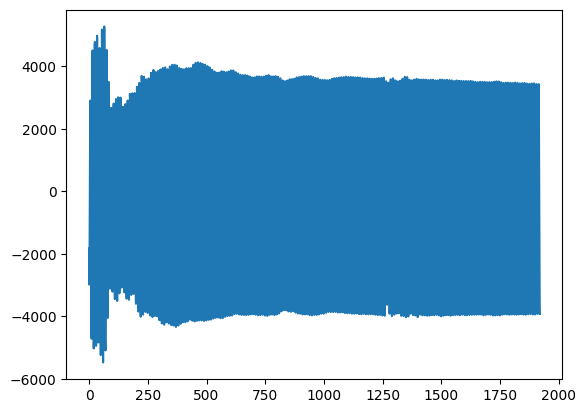

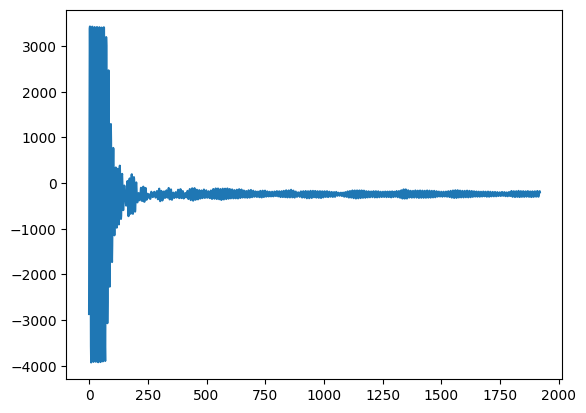

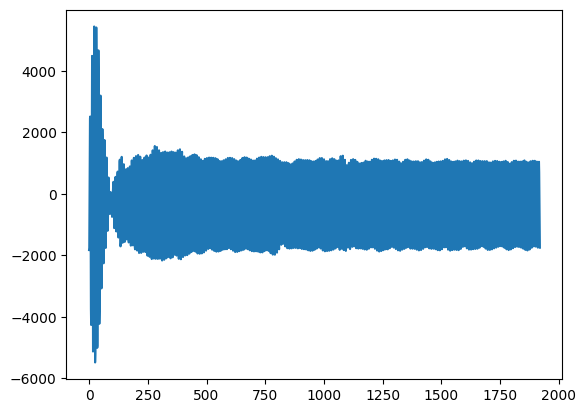

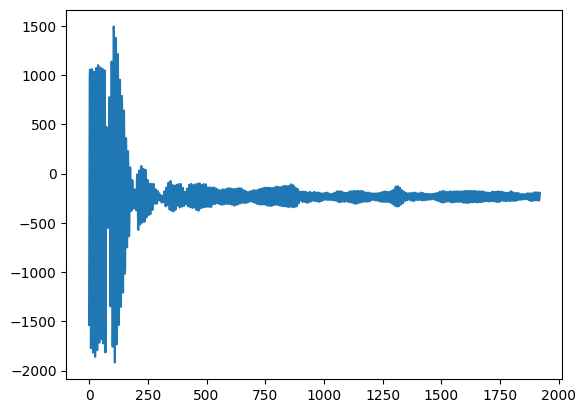

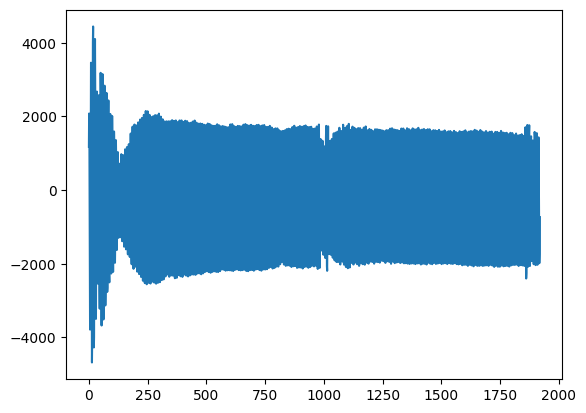

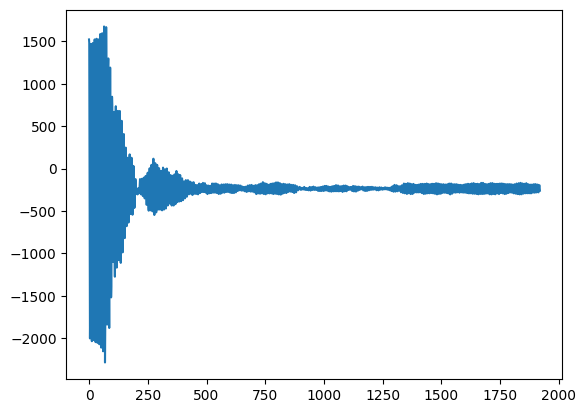

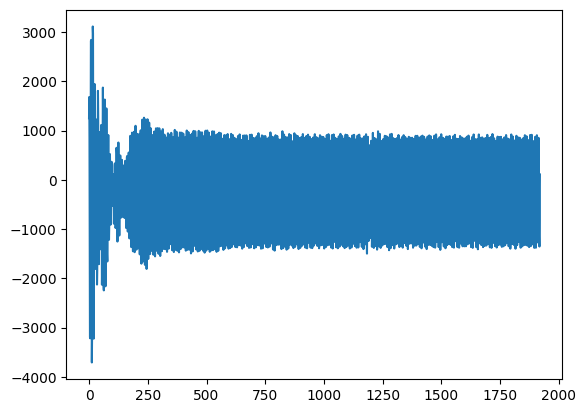

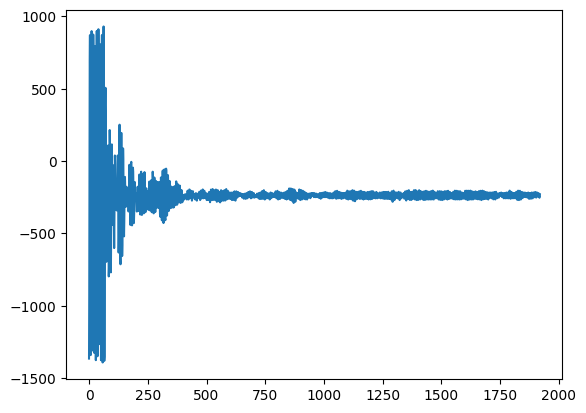

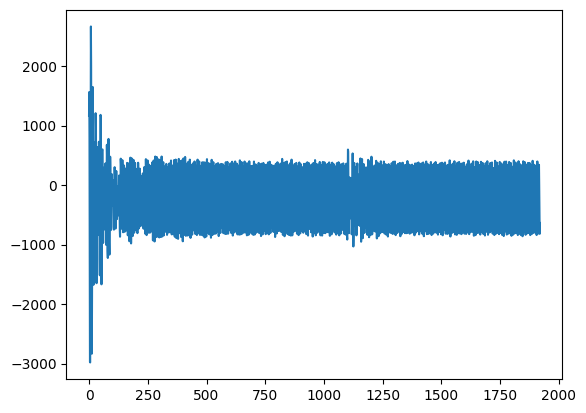

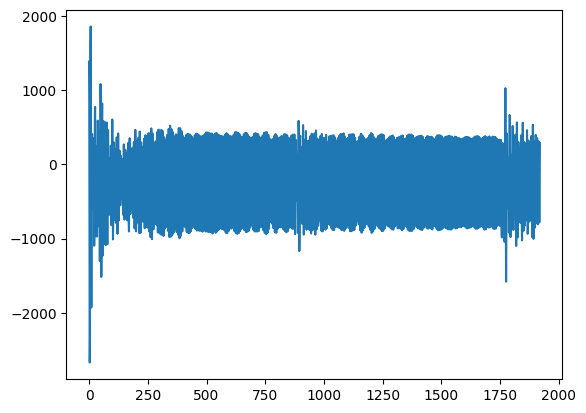

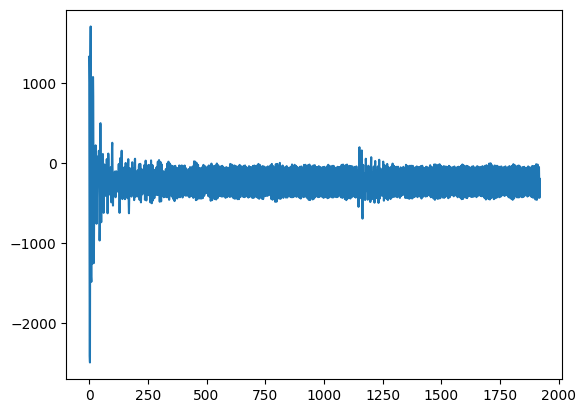

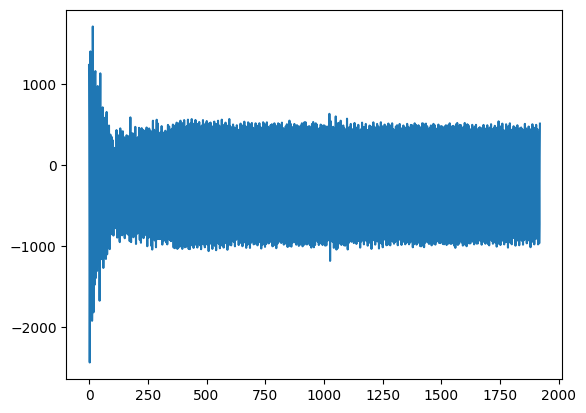

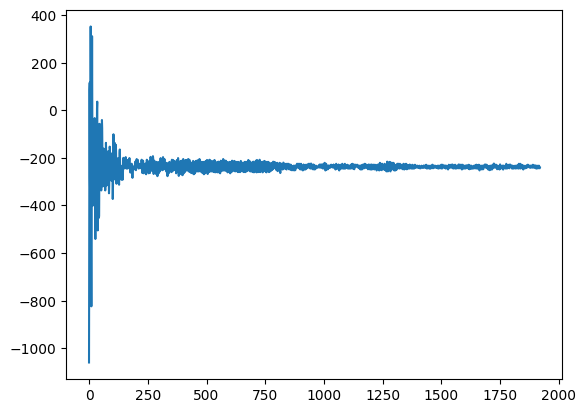

In [6]:
from robin.process.analyze import remove_leading_silence

def extract_samples_spaced_by_silence(signal, sample_length_us, sample_rate, num):
    """
    Extract n samples of known length from the signal, assuming leading silence is removed between samples.

    Parameters:
    signal (ndarray): Input signal array.
    sample_length_us (int): Length of each sample in microseconds.
    sample_rate (int): Number of samples per second in the signal.
    num (int): Number of samples to extract.
    remove_leading_silence (function): Function to remove leading silence from a signal.

    Returns:
    list of ndarray: List of extracted samples.
    """
    # Convert sample length from microseconds to samples
    sample_length_samples = int(sample_rate * sample_length_us / 1e6)

    # Extract samples
    samples = []
    current_signal = signal.copy()
    for _ in range(num):
        # Remove the extracted sample and leading silence from the remaining signal
        current_signal = remove_leading_silence(current_signal[sample_length_samples:], threshold_db=-30)

        if len(current_signal) < sample_length_samples:
            break  # Break if remaining signal is shorter than required sample length

        # Extract the sample
        sample = current_signal[:sample_length_samples]
        samples.append(sample)
        plt.plot(sample)
        plt.show()

    return samples

_ = extract_samples_spaced_by_silence(signal, exp.tone_length_us, exp.sample_rate, len(exp.frequencies))